In [103]:
#Importing dependecies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [104]:
#Import and read in US Covid data
covid_file = Path("Resources/us.csv")
covid_df = pd.read_csv(covid_file)
covid_df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [105]:
#Import and read in vaccination search data
vaccination_file = Path("Resources/vaccination-search-insights.csv")
vaccination_search_df = pd.read_csv(vaccination_file)
vaccination_search_df.head()

,date,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2021-01-04,CA,33.963,4.520,5.881
1,2021-01-04,CA_AB,31.736,3.774,5.825
2,2021-01-04,CA_BC,35.991,4.243,6.136
3,2021-01-04,CA_MB,35.921,6.236,6.335
4,2021-01-04,CA_NB,27.852,2.853,4.950


In [106]:
#merge the two US Covid data and Vaccination search data
search_df = pd.merge(covid_df, vaccination_search_df,  on='date')
search_df

,date,cases,deaths,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2021-01-04,20917269,353743,CA,33.963,4.520,5.881
1,2021-01-04,20917269,353743,CA_AB,31.736,3.774,5.825
2,2021-01-04,20917269,353743,CA_BC,35.991,4.243,6.136
3,2021-01-04,20917269,353743,CA_MB,35.921,6.236,6.335
4,2021-01-04,20917269,353743,CA_NB,27.852,2.853,4.950
...,...,...,...,...,...,...,...
248823,2022-09-05,94563745,1043455,US_WY_56033,6.886,NaN,NaN
248824,2022-09-05,94563745,1043455,US_WY_56035,10.359,NaN,NaN
248825,2022-09-05,94563745,1043455,US_WY_56037,5.125,NaN,NaN
248826,2022-09-05,94563745,1043455,US_WY_56039,12.755,1.822,0.734


In [107]:
#reduce the dataframe down to just US data
us_df = search_df.loc[search_df["key"] == "US"]
us_df.head()

,date,cases,deaths,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
122,2021-01-04,20917269,353743,US,53.694,19.203,8.406
3254,2021-01-11,22675892,376488,US,68.252,28.211,8.266
6379,2021-01-18,24127989,399065,US,60.840,25.219,7.378
9500,2021-01-25,25336637,421126,US,61.072,24.518,7.711
12620,2021-02-01,26363284,443249,US,56.989,23.223,7.750


In [108]:
#Create a new variable for the changes in cases and add to the dataframe
us_df["changes_in_cases"] = us_df['cases'] - us_df['cases'].shift(1)
us_df = us_df.dropna(how='any')
us_df

,date,cases,deaths,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects,changes_in_cases
3254,2021-01-11,22675892,376488,US,68.252,28.211,8.266,1758623.0
6379,2021-01-18,24127989,399065,US,60.840,25.219,7.378,1452097.0
9500,2021-01-25,25336637,421126,US,61.072,24.518,7.711,1208648.0
12620,2021-02-01,26363284,443249,US,56.989,23.223,7.750,1026647.0
15733,2021-02-08,27139070,464936,US,66.057,30.287,10.835,775786.0
...,...,...,...,...,...,...,...,...
237601,2022-08-08,92079701,1030371,US,6.900,0.845,0.835,788445.0
239840,2022-08-15,92788886,1033762,US,6.728,0.757,0.787,709185.0
242064,2022-08-22,93441270,1036961,US,6.457,0.663,0.747,652384.0
244286,2022-08-29,94063866,1040297,US,8.658,1.258,0.681,622596.0


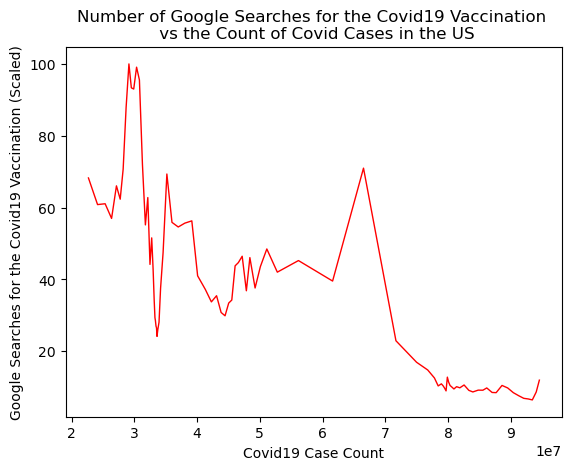

In [109]:
#Create a scatter plot of the number of searches by the case count
plt.plot(us_df["cases"], us_df["sni_covid19_vaccination"], linewidth=1, color='r')
plt.title("Number of Google Searches for the Covid19 Vaccination \n vs the Count of Covid Cases in the US")
plt.xlabel("Covid19 Case Count")
plt.ylabel("Google Searches for the Covid19 Vaccination (Scaled)")
plt.show()

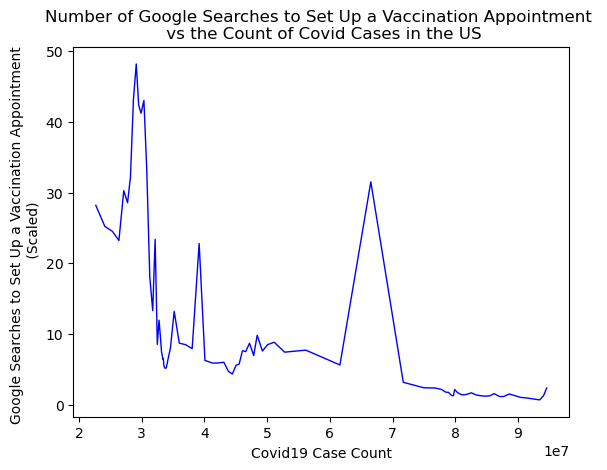

In [110]:
#Create a scatter plot of the number of searches to mak a vaccine appointment by the case count
plt.plot(us_df["cases"], us_df["sni_vaccination_intent"], linewidth=1, color='b')
plt.title("Number of Google Searches to Set Up a Vaccination Appointment \n vs the Count of Covid Cases in the US")
plt.xlabel("Covid19 Case Count")
plt.ylabel("Google Searches to Set Up a Vaccination Appointment \n (Scaled)")
plt.show()

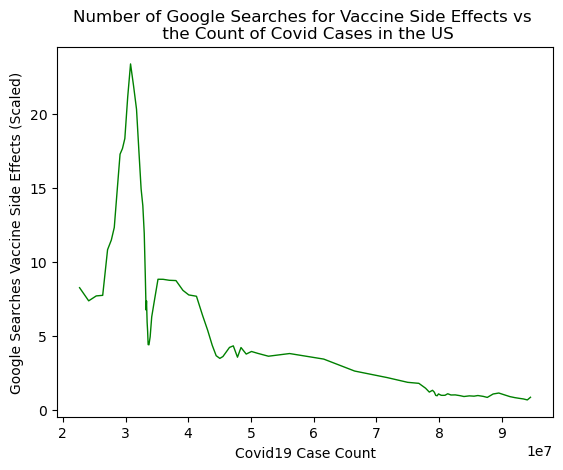

In [111]:
##Create a scatter plot of the number of searches for vaccine side effects by the case count
plt.plot(us_df["cases"], us_df["sni_safety_side_effects"], linewidth=1, color='g')
plt.title("Number of Google Searches for Vaccine Side Effects vs \n the Count of Covid Cases in the US")
plt.xlabel("Covid19 Case Count")
plt.ylabel("Google Searches Vaccine Side Effects (Scaled)")
plt.show()

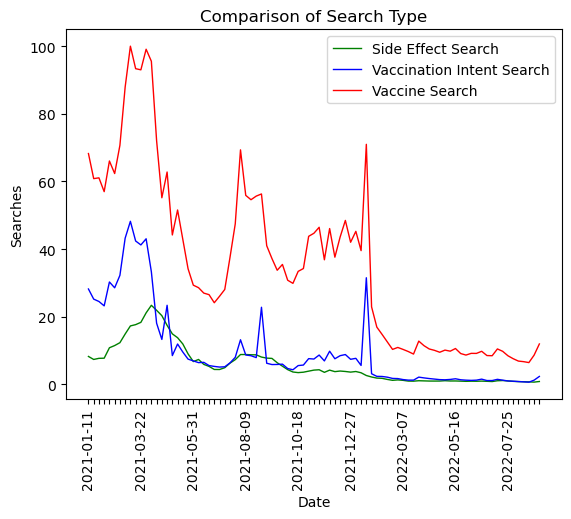

In [112]:
fig, ax1 = plt.subplots()

SideEffect, = plt.plot(us_df["date"], us_df["sni_safety_side_effects"], linewidth=1, color='g', label="Side Effect Search")
VaccinationIntent, = plt.plot(us_df["date"], us_df["sni_vaccination_intent"], linewidth=1, color='b', label="Vaccination Intent Search")
Vaccine, = plt.plot(us_df["date"], us_df["sni_covid19_vaccination"], linewidth=1, color='r', label="Vaccine Search")
plt.title("Comparison of Search Type")
plt.xlabel("Date")
plt.ylabel("Searches")

plt.legend(handles=[SideEffect, VaccinationIntent, Vaccine], loc="upper right")

n = 10
plt.xticks(rotation = 90)
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]


plt.savefig("outputs/SearchComparison.png")
plt.show()

In [113]:
#Import Vaccination data and read it in
vac_file = Path("Resources/vaccinations.csv")
vac_df = pd.read_csv(vac_file)
vac_df = vac_df.rename(columns={'location_key': 'key'})
vac_df.head()

,date,key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-12,AD,331.0,1622.0,NaN,NaN,331.0,1622.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-19,AD,519.0,2141.0,NaN,NaN,519.0,2141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#Merge the two dataframes
vac_merge = pd.merge(us_df, vac_df,  on=['key', 'date'])
vac_merge = vac_merge.reset_index()
vac_merge.head()

,index,date,cases,deaths,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects,changes_in_cases,new_persons_vaccinated,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,0,2021-01-11,22675892,376488,US,68.252,28.211,8.266,1758623.0,723451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-01-18,24127989,399065,US,60.840,25.219,7.378,1452097.0,642337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-01-25,25336637,421126,US,61.072,24.518,7.711,1208648.0,860420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-02-01,26363284,443249,US,56.989,23.223,7.750,1026647.0,776442.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2021-02-08,27139070,464936,US,66.057,30.287,10.835,775786.0,837563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#Look at variable counts
vac_merge.count()

index                                            87
date                                             87
cases                                            87
deaths                                           87
key                                              87
sni_covid19_vaccination                          87
sni_vaccination_intent                           87
sni_safety_side_effects                          87
changes_in_cases                                 87
new_persons_vaccinated                           87
cumulative_persons_vaccinated                    87
new_persons_fully_vaccinated                     87
cumulative_persons_fully_vaccinated              87
new_vaccine_doses_administered                   87
cumulative_vaccine_doses_administered            87
new_persons_vaccinated_pfizer                     0
cumulative_persons_vaccinated_pfizer              0
new_persons_fully_vaccinated_pfizer              76
cumulative_persons_fully_vaccinated_pfizer       77
new_vaccine_

In [116]:
#Remove columns that don't contain data
columns_to_delete = ['total_vaccine_doses_administered_sinovac', 'new_vaccine_doses_administered_sinovac', 'total_persons_fully_vaccinated_sinovac',
                     'new_persons_fully_vaccinated_sinovac', 'total_persons_vaccinated_sinovac', 'new_persons_vaccinated_sinovac', 
                     'cumulative_persons_vaccinated_janssen', 'new_persons_vaccinated_janssen', 'cumulative_persons_vaccinated_moderna', 
                     'new_persons_vaccinated_moderna', 'cumulative_persons_vaccinated_pfizer', 'new_persons_vaccinated_pfizer']
vac_merge = vac_merge.drop(columns=columns_to_delete)
vac_merge.count()

index                                            87
date                                             87
cases                                            87
deaths                                           87
key                                              87
sni_covid19_vaccination                          87
sni_vaccination_intent                           87
sni_safety_side_effects                          87
changes_in_cases                                 87
new_persons_vaccinated                           87
cumulative_persons_vaccinated                    87
new_persons_fully_vaccinated                     87
cumulative_persons_fully_vaccinated              87
new_vaccine_doses_administered                   87
cumulative_vaccine_doses_administered            87
new_persons_fully_vaccinated_pfizer              76
cumulative_persons_fully_vaccinated_pfizer       77
new_vaccine_doses_administered_pfizer            76
cumulative_vaccine_doses_administered_pfizer     77
new_persons_

In [117]:
#remove N/As and replace with 0
vac_merge.fillna(0, inplace=True)
vac_merge.count()

index                                            87
date                                             87
cases                                            87
deaths                                           87
key                                              87
sni_covid19_vaccination                          87
sni_vaccination_intent                           87
sni_safety_side_effects                          87
changes_in_cases                                 87
new_persons_vaccinated                           87
cumulative_persons_vaccinated                    87
new_persons_fully_vaccinated                     87
cumulative_persons_fully_vaccinated              87
new_vaccine_doses_administered                   87
cumulative_vaccine_doses_administered            87
new_persons_fully_vaccinated_pfizer              87
cumulative_persons_fully_vaccinated_pfizer       87
new_vaccine_doses_administered_pfizer            87
cumulative_vaccine_doses_administered_pfizer     87
new_persons_

In [118]:
#Remove the last two rows of data because they did not contain count information
vac_merge
vac_merge.drop([85,86], axis=0, inplace=True)
vac_merge

,index,date,cases,deaths,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects,changes_in_cases,new_persons_vaccinated,...,new_vaccine_doses_administered_pfizer,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen
0,0,2021-01-11,22675892,376488,US,68.252,28.211,8.266,1758623.0,723451.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-01-18,24127989,399065,US,60.840,25.219,7.378,1452097.0,642337.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-01-25,25336637,421126,US,61.072,24.518,7.711,1208648.0,860420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-02-01,26363284,443249,US,56.989,23.223,7.750,1026647.0,776442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-02-08,27139070,464936,US,66.057,30.287,10.835,775786.0,837563.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,2022-07-25,90412575,1023855,US,8.477,1.024,1.023,898141.0,60998.0,...,0.0,355396322.0,0.0,77356508.0,0.0,226623424.0,0.0,17081578.0,0.0,18855759.0
81,81,2022-08-01,91291256,1026937,US,7.608,0.948,0.904,878681.0,53044.0,...,0.0,356743474.0,0.0,77472533.0,0.0,227455167.0,0.0,17090635.0,0.0,18868083.0
82,82,2022-08-08,92079701,1030371,US,6.900,0.845,0.835,788445.0,49328.0,...,0.0,357149149.0,0.0,77468499.0,0.0,227621032.0,0.0,17054930.0,0.0,18832842.0
83,83,2022-08-15,92788886,1033762,US,6.728,0.757,0.787,709185.0,45217.0,...,0.0,358354212.0,0.0,77647511.0,0.0,228323295.0,0.0,17064965.0,0.0,18845464.0


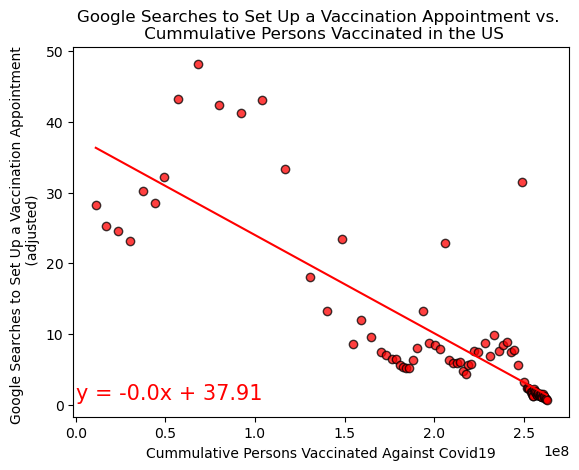

The slope is: -1.390054930320458e-07
The r value is: -0.8284724213025384


In [119]:
#Create a scatter plot comparing vaccination appointment search to cumulative persons vaccinated and include regression line
plt.scatter(vac_merge["cumulative_persons_vaccinated"], vac_merge["sni_vaccination_intent"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(vac_merge["cumulative_persons_vaccinated"], vac_merge["sni_vaccination_intent"])
regress_values = vac_merge["cumulative_persons_vaccinated"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(vac_merge["cumulative_persons_vaccinated"],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#Create graph labels
plt.xlabel('Cummulative Persons Vaccinated Against Covid19')
plt.ylabel('Google Searches to Set Up a Vaccination Appointment \n (adjusted)')
plt.title('Google Searches to Set Up a Vaccination Appointment vs. \n Cummulative Persons Vaccinated in the US')

#Save and show figure
plt.savefig("outputs/AppointmentCumVaccinated.png")
plt.show()

#Slope is rounded to zero due scale differences between the x- and y-axis
print("The slope is: " + str(slope))

print("The r value is: " + str(rvalue))

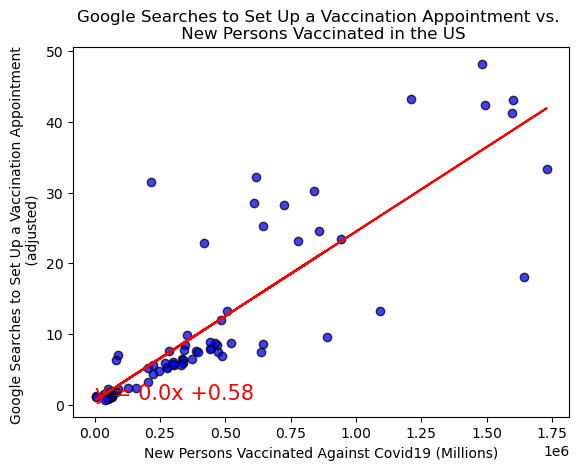

The slope is: 2.391252123441849e-05
The r value is: 0.8540985445683945


In [120]:
#Create a scatter plot comparing vaccination appointment search to new persons vaccinated and include regression line
plt.scatter(vac_merge["new_persons_vaccinated"], vac_merge["sni_vaccination_intent"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(vac_merge["new_persons_vaccinated"], vac_merge["sni_vaccination_intent"])
regress_values = vac_merge["new_persons_vaccinated"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(vac_merge["new_persons_vaccinated"],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#Create labels for graph
plt.xlabel('New Persons Vaccinated Against Covid19 (Millions)')
plt.ylabel('Google Searches to Set Up a Vaccination Appointment \n (adjusted)')
plt.title('Google Searches to Set Up a Vaccination Appointment vs. \n New Persons Vaccinated in the US')
plt.savefig("outputs/AppointmentNewVaccinated.png")

#Display graph
plt.show()

#Slope is rounded to zero due scale differences between the x- and y-axis
print("The slope is: " + str(slope))

print("The r value is: " + str(rvalue))

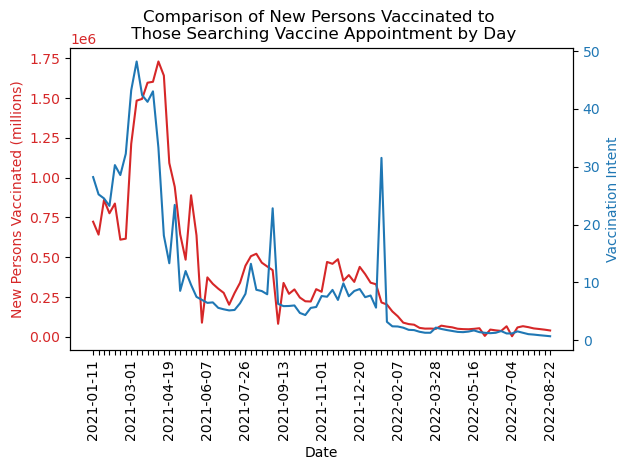

In [142]:
#Source: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
#Compare the new persons vaccinated and vaccination intent by day

x_axis = np.array(vac_merge["date"])
new_vaccinations = vac_merge["new_persons_vaccinated"]
vac_intent = vac_merge["sni_vaccination_intent"]

#Create two different y-axis scales to account for unit size difference
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Date")
ax1.set_ylabel("New Persons Vaccinated (millions)", color=color)
ax1.plot(x_axis, new_vaccinations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)
n = 7 #Show every 7th tick mark
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Vaccination Intent', color=color)
ax2.plot(x_axis, vac_intent, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison of New Persons Vaccinated to \n Those Searching Vaccine Appointment by Day")

fig.tight_layout()
plt.savefig("outputs/VaccinatedAppointmentDate.png")
plt.show()

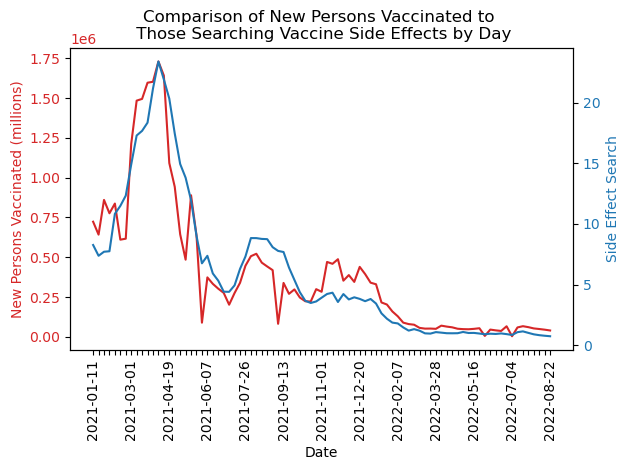

In [143]:
#Compare the new persons vaccinated and side effect searches by day
x_axis = np.array(vac_merge["date"])
new_vaccinations = vac_merge["new_persons_vaccinated"]
side_effect_search = vac_merge["sni_safety_side_effects"]

#Create two different y-axis scales to account for unit size difference
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Date")
ax1.set_ylabel("New Persons Vaccinated (millions)", color=color)
ax1.plot(x_axis, new_vaccinations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)
n = 7 #Show every 7th tick mark
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Side Effect Search', color=color)
ax2.plot(x_axis, side_effect_search, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison of New Persons Vaccinated to \n Those Searching Vaccine Side Effects by Day")

fig.tight_layout()
plt.savefig("outputs/VaccinatedSideEffectDate.png")
plt.show()

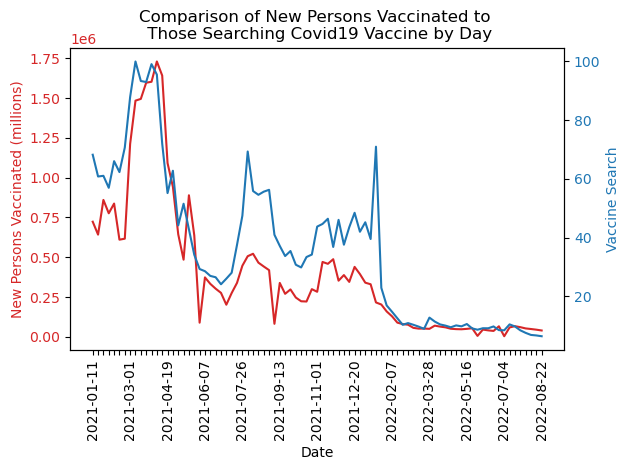

In [144]:
#Compare the new persons vaccinated and vaccine search by day
x_axis = np.array(vac_merge["date"])
new_vaccinations = vac_merge["new_persons_vaccinated"]
vac_search = vac_merge["sni_covid19_vaccination"]

#Create two different y-axis scales to account for unit size difference
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Date")
ax1.set_ylabel("New Persons Vaccinated (millions)", color=color)
ax1.plot(x_axis, new_vaccinations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)
n = 7 #Show every 7th tick mark
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Vaccine Search', color=color)
ax2.plot(x_axis, vac_search, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison of New Persons Vaccinated to \n Those Searching Covid19 Vaccine by Day")

#Show every 25th tick mark
fig.tight_layout()
plt.savefig("outputs/VaccinatedSearchDate.png")
plt.show()

In [124]:
#Create varibles for total count fully vaccinated persons per vaccine type
total_janssen = vac_merge["cumulative_persons_fully_vaccinated_janssen"][84]
print(total_janssen)
total_moderna = vac_merge["cumulative_persons_fully_vaccinated_moderna"][84]
print(total_moderna)
total_pfizer = vac_merge["cumulative_persons_fully_vaccinated_pfizer"][84]
print(total_pfizer)
total_vaccinatated = vac_merge["cumulative_persons_fully_vaccinated"][84]
print(total_vaccinatated)
print(total_janssen + total_moderna + total_pfizer)

17072904.0
77738220.0
128685014.0
223684995.0
223496138.0


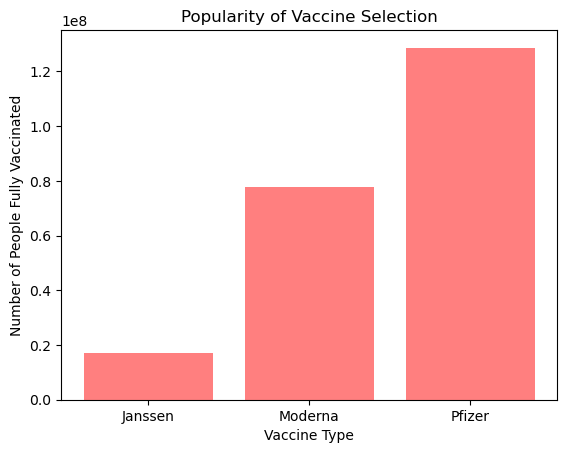

In [125]:
#Create a bar graph to compare vaccine popularity
vaccinated = [total_janssen, total_moderna, total_pfizer]
x_axis = np.arange(len(vaccinated))
plt.bar(x_axis, vaccinated, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Janssen", "Moderna", "Pfizer"])
plt.title("Popularity of Vaccine Selection")
plt.xlabel("Vaccine Type")
plt.ylabel("Number of People Fully Vaccinated")
plt.savefig("outputs/VaccineSelectionBar.png")
plt.show()

In [126]:
#Create variables to represent percentage of vaccine selection
percent_janssen = total_janssen/total_vaccinatated
percent_moderna = total_moderna/total_vaccinatated
percent_pfizer = total_pfizer/total_vaccinatated
percent_other = (total_vaccinatated - (total_janssen + total_moderna + total_pfizer))/total_vaccinatated
print(percent_janssen, percent_moderna, percent_pfizer, percent_other)

0.07632565608614024 0.34753435294128693 0.5752956920512259 0.0008442989213469594


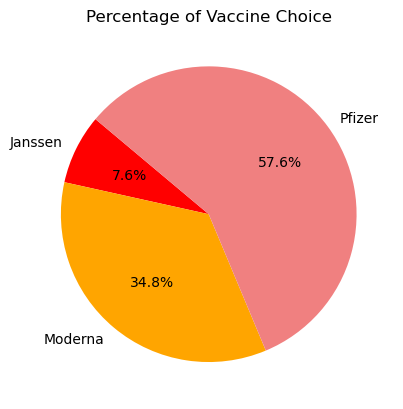

In [127]:
#Create a pie chart of vaccine selection
labels = ["Janssen", "Moderna", "Pfizer"]
sizes = [percent_janssen, percent_moderna, percent_pfizer]
colors = ["red", "orange", "lightcoral", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Vaccine Choice")
plt.savefig("outputs/VaccinateSelectionPie.png")
plt.show()

In [128]:
#Create a dataframe of the observed vaccine selection
observed = pd.Series([total_janssen, total_moderna, total_pfizer], index=["Janssen", "Moderna", "Pfizer"])
vaccinated_df = pd.DataFrame([observed]).T

In [129]:
#Add the expected value of selection per vaccine to a new column
vaccinated_df[1] = (total_janssen + total_moderna + total_pfizer)/3
vaccinated_df.columns = ["Observed", "Expected"]
vaccinated_df

,Observed,Expected
Janssen,17072904.0,7.449871e+07
Moderna,77738220.0,7.449871e+07
Pfizer,128685014.0,7.449871e+07


In [130]:
#Find the critical value when alpha = 0.05 and degrees of freedom = 2
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [131]:
#Perform a Chi Square analysis
stats.chisquare(vaccinated_df['Observed'], vaccinated_df['Expected'])

Power_divergenceResult(statistic=83818537.76332542, pvalue=0.0)

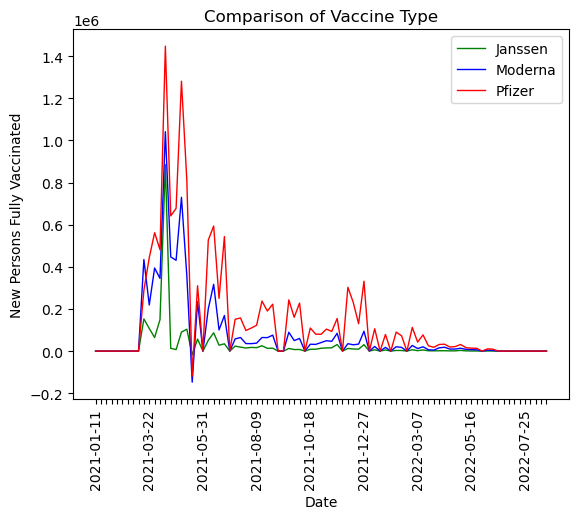

In [132]:
#Create a comparison of vaccine choice
fig, ax1 = plt.subplots()

Janssen, = plt.plot(vac_merge["date"], vac_merge["new_persons_fully_vaccinated_janssen"], linewidth=1, color='g', label="Janssen")
Moderna, = plt.plot(vac_merge["date"], vac_merge["new_persons_fully_vaccinated_moderna"], linewidth=1, color='b', label="Moderna")
Pfizer, = plt.plot(vac_merge["date"], vac_merge["new_persons_fully_vaccinated_pfizer"], linewidth=1, color='r', label="Pfizer")
plt.title("Comparison of Vaccine Type")
plt.xlabel("Date")
plt.ylabel("New Persons Fully Vaccinated")

plt.legend(handles=[Janssen, Moderna, Pfizer], loc="upper right")

n = 10
plt.xticks(rotation = 90)
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]


plt.savefig("outputs/DoseTypeComparison.png")
plt.show()

In [133]:
#Press release of potential blood clotting effect in J&J vaccine: https://www.cdc.gov/media/releases/2021/s0413-JJ-vaccine.html
vac_merge.dtypes

index                                              int64
date                                              object
cases                                              int64
deaths                                             int64
key                                               object
sni_covid19_vaccination                          float64
sni_vaccination_intent                           float64
sni_safety_side_effects                          float64
changes_in_cases                                 float64
new_persons_vaccinated                           float64
cumulative_persons_vaccinated                    float64
new_persons_fully_vaccinated                     float64
cumulative_persons_fully_vaccinated              float64
new_vaccine_doses_administered                   float64
cumulative_vaccine_doses_administered            float64
new_persons_fully_vaccinated_pfizer              float64
cumulative_persons_fully_vaccinated_pfizer       float64
new_vaccine_doses_administered_

In [134]:
vac_merge[["Year", "Month", "Day"]] = vac_merge["date"].str.split("-", expand=True)
vac_merge.head()

,index,date,cases,deaths,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects,changes_in_cases,new_persons_vaccinated,...,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,Year,Month,Day
0,0,2021-01-11,22675892,376488,US,68.252,28.211,8.266,1758623.0,723451.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,01,11
1,1,2021-01-18,24127989,399065,US,60.840,25.219,7.378,1452097.0,642337.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,01,18
2,2,2021-01-25,25336637,421126,US,61.072,24.518,7.711,1208648.0,860420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,01,25
3,3,2021-02-01,26363284,443249,US,56.989,23.223,7.750,1026647.0,776442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,02,01
4,4,2021-02-08,27139070,464936,US,66.057,30.287,10.835,775786.0,837563.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,02,08


In [135]:
#Create a new dataframe that only contains data from April 2021
year2021 = vac_merge.loc[vac_merge["Year"] == "2021"]
April2021 = year2021.loc[year2021["Month"] == "04"]
April2021.dtypes

index                                              int64
date                                              object
cases                                              int64
deaths                                             int64
key                                               object
sni_covid19_vaccination                          float64
sni_vaccination_intent                           float64
sni_safety_side_effects                          float64
changes_in_cases                                 float64
new_persons_vaccinated                           float64
cumulative_persons_vaccinated                    float64
new_persons_fully_vaccinated                     float64
cumulative_persons_fully_vaccinated              float64
new_vaccine_doses_administered                   float64
cumulative_vaccine_doses_administered            float64
new_persons_fully_vaccinated_pfizer              float64
cumulative_persons_fully_vaccinated_pfizer       float64
new_vaccine_doses_administered_

In [136]:
#View new dataframe
April2021

,index,date,cases,deaths,key,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects,changes_in_cases,new_persons_vaccinated,...,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,Year,Month,Day
12,12,2021-04-05,30802221,555129,US,95.537,33.291,23.391,453505.0,1730288.0,...,27126618.0,752279.0,76791212.0,149318.0,4176893.0,149926.0,4204015.0,2021,04,05
13,13,2021-04-12,31283990,562027,US,72.037,18.095,21.906,481769.0,1641822.0,...,31014082.0,2072210.0,84694388.0,884558.0,6820188.0,887776.0,6859877.0,2021,04,12
14,14,2021-04-19,31754642,567317,US,55.185,13.297,20.327,470652.0,1092072.0,...,35439161.0,820978.0,93002433.0,13216.0,7896144.0,13472.0,7949021.0,2021,04,19
15,15,2021-04-26,32139580,572259,US,62.795,23.396,17.461,384938.0,942921.0,...,39855028.0,798607.0,100830533.0,7196.0,8021694.0,7406.0,8087269.0,2021,04,26


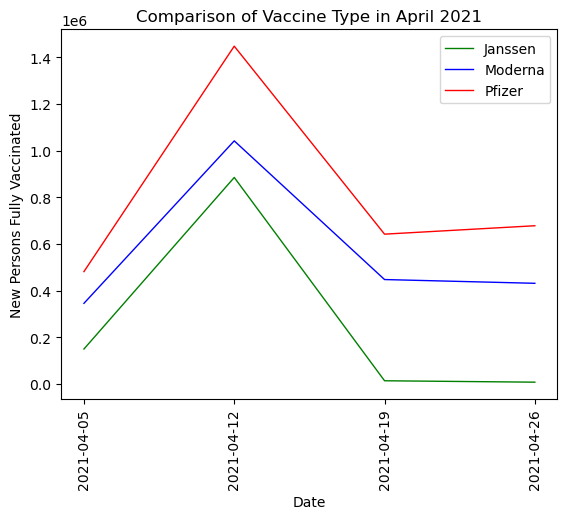

In [137]:
#Compare vaccine choice before and after J&J 
Janssen, = plt.plot(April2021["date"], April2021["new_persons_fully_vaccinated_janssen"], linewidth=1, color='g', label="Janssen")
Moderna, = plt.plot(April2021["date"], April2021["new_persons_fully_vaccinated_moderna"], linewidth=1, color='b', label="Moderna")
Pfizer, = plt.plot(April2021["date"], April2021["new_persons_fully_vaccinated_pfizer"], linewidth=1, color='r', label="Pfizer")
plt.title("Comparison of Vaccine Type in April 2021")
plt.xlabel("Date")
plt.ylabel("New Persons Fully Vaccinated")

plt.legend(handles=[Janssen, Moderna, Pfizer], loc="upper right")

plt.xticks(rotation = 90)


plt.savefig("April2021.png")
plt.show()

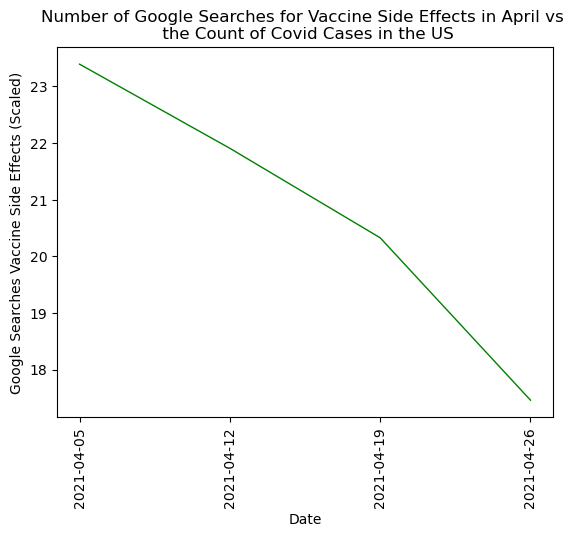

In [138]:
plt.plot(April2021["date"], April2021["sni_safety_side_effects"], linewidth=1, color='g')
plt.title("Number of Google Searches for Vaccine Side Effects in April vs \n the Count of Covid Cases in the US")
plt.xlabel("Date")
plt.ylabel("Google Searches Vaccine Side Effects (Scaled)")

plt.xticks(rotation = 90)


plt.savefig("April2021SideEffects.png")
plt.show()